<a href="https://colab.research.google.com/github/dkhanna511/Pytorch_tutorials_Revision/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
 import torch
 import numpy as np
 import torch.nn as nn
 import torch.nn.functional as F
 from torch.utils.data import DataLoader
 from torchvision import datasets, transforms
 from torchvision.utils import make_grid

 import pandas as pd
 from sklearn.metrics import confusion_matrix
 import matplotlib.pyplot as plt
 %matplotlib inline

In [37]:

## Convert MNIST image files into tensor of 4-dimensions (# of images, height, width, channels)
transform = transforms.ToTensor()




In [38]:
## Train Dataset
train_data = datasets.MNIST(root = '/cnn_data', train = True, download = True, transform = transform)

In [39]:
## test dataset
test_data = datasets.MNIST(root = '/cnn_data', train = False, download = True, transform = transform)

In [40]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [41]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [42]:
pwd

'/content'

In [43]:
ls

sample_data/


In [44]:
cd ../

/


In [45]:
pwd

'/'

In [46]:
ls

bin@                        datalab/  lib@     mnt/                      root/  tmp/
boot/                       dev/      lib32@   NGC-DL-CONTAINER-LICENSE  run/   tools/
cnn_data/                   etc/      lib64@   opt/                      sbin@  usr/
content/                    home/     libx32@  proc/                     srv/   var/
cuda-keyring_1.0-1_all.deb  kaggle/   media/   python-apt/               sys/


In [47]:
cd cnn_data/

/cnn_data


In [48]:
ls

MNIST/


In [49]:
cd ../content/

/content


## Defining dataloaders and playing the layers as of now.

In [50]:
## create a small batch for the images -- Dataloader
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [51]:
## Define out CNN Model
## Describe Convlutional Layer and what it is doing (2 Convlutional layer)
## Thi is just an example

conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1, padding = 0)
conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)



In [52]:
## Grab 1 MNIST Record/image
for i, (X_train, y_train) in enumerate(train_data):
    break
X_train.shape


torch.Size([1, 28, 28])

In [53]:
## We want to change this x_train into a 4D Batch
x = X_train.view(1,1, 28, 28)

In [54]:
## Perform convlutional
x = F.relu(conv1(x)) ## Rectified Linear unit for Activation function

In [55]:
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1849, 0.1849, 0.1849,  ..., 0.1849, 0.1849, 0.1849],
          [0.1849, 0.1849, 0.1849,  ..., 0.1849, 0.1849, 0.1849],
          [0.1849, 0.1849, 0.1849,  ..., 0.1849, 0.1849, 0.1849],
          ...,
          [0.1849, 0.1849, 0.2393,  ..., 0.1849, 0.1849, 0.1849],
          [0.1849, 0.1849, 0.1613,  ..., 0.1849, 0.1849, 0.1849],
          [0.1849, 0.1849, 0.1849,  ..., 0.1849, 0.1849, 0.1849]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [56]:
x.shape     ### It gi=ves (1, 6, 26, 26)  1: single image, 6: output channels of conv1 layer, 26*26 --> output height x width because  padding was 0 so stride reduced the size. very very basic

torch.Size([1, 6, 26, 26])

In [57]:
## pass through the pooling layer now

x = F.max_pool2d(x, kernel_size = 2, stride = 2)

In [58]:
x.shape  ### pooling took the stride and kernel size as 2, which naturally reduces the size by 2  26/2 = 13

torch.Size([1, 6, 13, 13])

In [59]:
### Lets do a seocnd convolutional layer now
x = F.relu(conv2(x))    ## 1: only 1 image, 16 =  number of output channels, (11, 11) : the reduction because of no padding
x.shape    ###

torch.Size([1, 16, 11, 11])

In [60]:
x = F.max_pool2d(x, kernel_size = 2, stride= 2)
x.shape ## gives (1, 16, 5, 5) ---> same logic as above, 11/2 = 5.5 = 5

torch.Size([1, 16, 5, 5])

# Enough played, now building the CNN Network

In [73]:
class ConvlutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1)

        ## Fully connected layer
        self.fc1 = nn.Linear(5*5*16, 120)     ## 120 neurons, 5*5*16 comes from the dimensions of conv2d ( 5, 5, 16)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))

        x = F.max_pool2d(x, 2, 2)

        ## Rehaping (flattening) the outputs in order to pass it through the linear layers
        x = x.view(-1, 16 * 5*5)

        ## Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        ## Not putting the relu coz this is basically the output layer.
        x = self.fc3(x)

        ## Softmax gives us the probabilities between 0 and 1 since this is a multi class classification
        return F.log_softmax(x, dim = 1)






In [74]:
torch.manual_seed(41)  ## Setting up a seed where to start the weights (somewhat)

## Creating an instance of the model

model = ConvlutionalNetwork()
model


ConvlutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [75]:
## Loss function  & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) ## Smaller the learning rate, the longer it's gonna train



In [78]:
import time
start_time = time.time()

## Create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

## For loop of epochs

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    ## Train

    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train) ## Get predicted values from the training set. Not flattened
        loss = criterion(y_pred, y_train) ## Show how far off we are? Compare the predictions to correct labels

        predicted = torch.max(y_pred.data, 1)[1] ## Add up the number of correct predictions

        batch_corr = (predicted == y_train).sum() ## How many we got correct from this specific batch, True = 1, False = 0, Sum the True ones
        train_corr +=batch_corr ## keep track as we go along in training

        ## update our parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ## Print out some results:
        if b%600 ==0:
            print("Epoch : {}, Batch : {}, Loss : {}".format(i, b, loss.item()))
    train_losses.append(loss)
    train_correct.append(train_corr)


    ## Test
    with torch.no_grad(): ## No gradient so we dont update our weights and biases with test
        for b, (X_test, Y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]  ## Adding up correct predictions

            test_corr += (predicted == Y_test).sum()

        loss = criterion(y_val, Y_test)
        test_losses.append(loss)
        test_correct.append(test_corr)


current_time = time.time()
total_time = current_time - start_time
print("Training took : {} minutes".format(total_time/60))

Epoch : 0, Batch : 600, Loss : 0.14749222993850708
Epoch : 0, Batch : 1200, Loss : 0.2706121802330017
Epoch : 0, Batch : 1800, Loss : 0.00956921186298132
Epoch : 0, Batch : 2400, Loss : 0.0063883536495268345
Epoch : 0, Batch : 3000, Loss : 0.002237545093521476
Epoch : 0, Batch : 3600, Loss : 0.23918752372264862
Epoch : 0, Batch : 4200, Loss : 0.00048339104978367686
Epoch : 0, Batch : 4800, Loss : 0.1504632532596588
Epoch : 0, Batch : 5400, Loss : 0.0010857878951355815
Epoch : 0, Batch : 6000, Loss : 0.001957091735675931
Epoch : 1, Batch : 600, Loss : 0.011673185043036938
Epoch : 1, Batch : 1200, Loss : 0.13187162578105927
Epoch : 1, Batch : 1800, Loss : 0.5180457830429077
Epoch : 1, Batch : 2400, Loss : 0.31928375363349915
Epoch : 1, Batch : 3000, Loss : 0.5415772795677185
Epoch : 1, Batch : 3600, Loss : 0.004114631563425064
Epoch : 1, Batch : 4200, Loss : 0.4243695139884949
Epoch : 1, Batch : 4800, Loss : 0.0007736948318779469
Epoch : 1, Batch : 5400, Loss : 0.009582110680639744
Epoch

## Creating plots

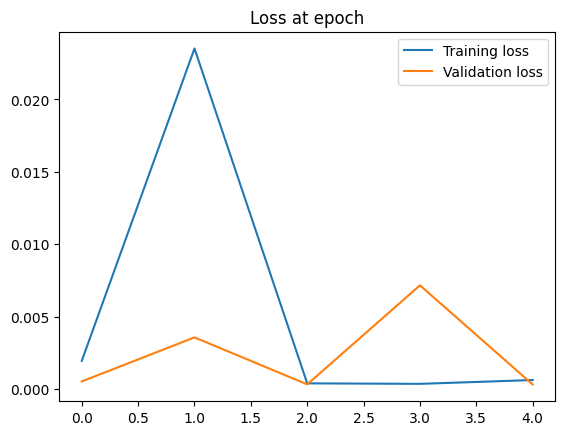

In [83]:
## Graph the loss at each epoch
# print(test_losses)
# train_losses = [tl.item() for tl in train_losses]
# test_losses = [tl.item() for tl in test_losses]

plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label ="Validation loss")
plt.title("Loss at epoch")
plt.legend()


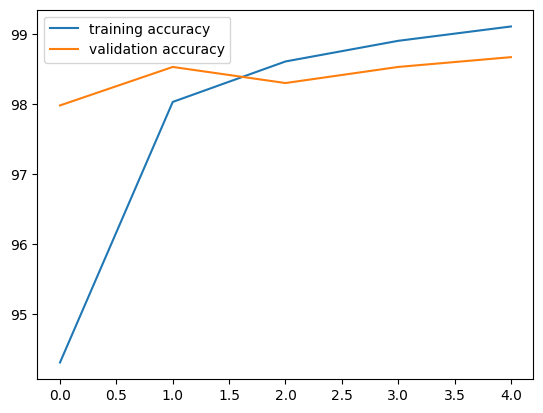

In [84]:
### graph the accuracy at the end of each epoch

plt.plot([t/600 for t in train_correct], label = "training accuracy")
plt.plot([t/100 for t in test_correct], label = "validation accuracy")
plt.legend()


In [85]:
test_loader_everything = DataLoader(test_data, batch_size = 10000, shuffle = False)
with torch.no_grad():
    correct = 0
    for (X_test, y_test) in test_loader_everything:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct +=(predicted == y_test).sum()




In [86]:
correct.item()

9867

In [88]:
correct.item()/len(test_data) * 100   ## Accuracy

98.67